In [7]:
from set_path import set_root_path
set_root_path()

Working directory: /Users/ashleycottrell/code/repositories/relativisticpy


In [8]:
from relativisticpy.algebras import Indices, Idx, EinsumArray
from relativisticpy.diffgeom.tensor import Tensor
from relativisticpy.diffgeom import Metric, CoordinatePatch, Manifold, Patch
import sympy as smp
from sympy import sin, cos, tan, tensorcontraction, trigsimp
from relativisticpy.symengine import (
    Function,
    Symbol,
    Basic,
    sin,
    oo,
    Sum,
    re,
    im,
    Product,
    integrate,
    Eq,
    SymbolArray,
    solve,
    diff,
    Pow,
    Rational,
    expand,
    limit,
    simplify,
    root,
    symbols,
    dsolve,
    exp,
    I
)

from sympy import Eq, factorial, latex

x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
t = Symbol('t')
r = Symbol('r')
basis = SymbolArray([x, y, z, t])

x, y, z, t, r, theta, phi, G, M, c = symbols("x y z t r theta phi G M c")

metric_components = SymbolArray(
    [
        [-(1 - (2 * G * M) / (r)), 0, 0, 0],
        [0, 1 / (1 - (2 * G * M) / (r)), 0, 0],
        [0, 0, r**2, 0],
        [0, 0, 0, r**2 * sin(theta) ** 2],
    ]
)

test = SymbolArray(
    [
        [-(1 - (2 * G * M) / (r)), 0, 0, 0],
        [0, 1 / (1 - (2 * G * M) / (r)), 0, 0],
        [0, 0, r**2, 0],
        [0, 0, 0, r**2 * sin(theta) ** 2],
    ]
)

coordinate_patch = CoordinatePatch(Patch('schild', Manifold('blackhole', 4)), SymbolArray([r, theta, phi, t]))

idxa = Indices(Idx('a'), Idx('b'))
idxb = Indices(-Idx('a'), Idx('b'))

A = EinsumArray(idxa, SymbolArray([[x, y], [z, t]]))
B = EinsumArray(idxb, SymbolArray([[x, y], [y, x]]))
GR = SymbolArray([[r**2, theta**2, 0, 0], [r**2, theta**2, 0, 0], [r**2, theta**2, 0, 0], [r**2, theta**2, 0, 0]])

In [9]:
["l" if idx.covariant else "u" for idx in idxb.indices]

['u', 'l']

In [3]:
idxa.get_symbol_only_reshape(Indices(-Idx('b'), -Idx('a')))

(1, 0)

In [4]:
Indices(*[idxa.indices[i] for i in idxa.get_symbol_only_reshape(Indices(-Idx('a'),-Idx('b')))]).indices

(Indices('a',0,None,True) , Indices('b',1,None,True) )

In [5]:
metric_t = Metric(
                    idxa,
                    metric_components
                  )

ten = Tensor(idxa, GR)

In [6]:
ten.components

[[r**2, theta**2, 0, 0], [r**2, theta**2, 0, 0], [r**2, theta**2, 0, 0], [r**2, theta**2, 0, 0]]

In [7]:
ten.indices.indices

(Indices('a',0,None,True) , Indices('b',1,None,True) )

In [23]:
metric_t.reshape_rerank(ten, Indices(Idx('a'), Idx('b')))

In [6]:
ten.indices

NameError: name 'ten' is not defined

In [29]:
class Test:
    pass

A = Test()


In [30]:
class Teste:
    def __init__(self, a):
        self.a = a
    
    def get(self, s):
        return getattr(self.a, s)

In [31]:
teste = Teste(A)

In [34]:
A.a = 1
A.b = 2
A.c = 3
A.d = 4

In [36]:
teste.get("d")

4

This Equation of motion we will call E0 and it is given by:

$$1 = \left( 1 - \frac{r_s}{r} \right) \dot{t}^2 - \left( 1 - \frac{r_s}{r} \right)^{-1}  \dot{r}^2 - r^2 \dot{\theta}^2 - r^2\sin^2(\theta) \dot{\phi}^2$$

Important Remark: This will be used as a "Main Equation" meaning it is this equation which we will substitute the other differential equations into, to find a final differential equation of the form: 

$$E = KE + V_{eff}$$

<b>2. The Euler-Lagrange for t
    
We do not need to emmediatly use our Euler-Lagrange function to find this equation. Notice that since L is completly independent of time $t$
    
This means our E-L reduces to:
    
$$ \frac{d}{d\tau}\frac{\partial L}{\partial \dot{t}}=0 \Rightarrow \frac{\partial L}{\partial \dot{t}} = Constant$$

We write this constant as Energy $E$ and we find our first equation of motion as:

$$ \frac{dt}{d\tau} = \frac{E}{1 - \frac{r_s}{r}}$$

<b>5. The Euler-Lagrange for $\phi$
    
Just like in the case for time-component equation, $L$ is completly independent of $\phi$, which again, emediatly reduces the Euler-Lagrange equation to the form:
    
$$ \frac{d}{d\tau}\frac{\partial L}{\partial \dot{\phi}}=0 \Rightarrow \frac{\partial L}{\partial \dot{\phi}} = Constant$$

We write this constant as Angular Momentum, dented by $l$ and we find our phi equation of motion to be:
    
$$ \frac{d\phi}{d\tau} = \frac{l}{r^2\sin^2(\theta)} $$

In [28]:
import matplotlib as mlib

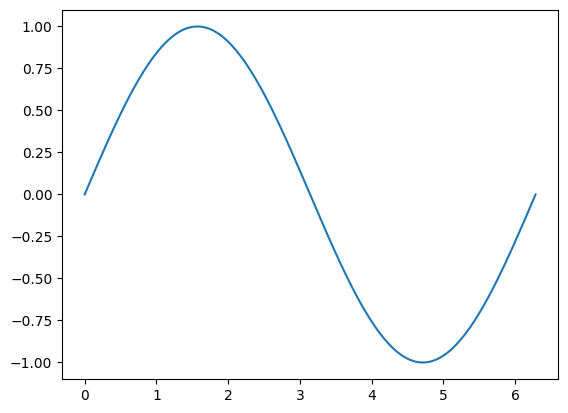

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

$$
C = \begin{pmatrix} 
1 &  2   & 3 \\
0 &  0   & x \\
y & f(x) & 0 \\
\end{pmatrix} 
$$

In [33]:
print("""
              Coordinates := \\begin{bmatrix} 
                                    t & r & theta & phi 
                                \\end{bmatrix}
                \\vspace{5mm}
                g_{\\mu\\nu} := \\begin{bmatrix}
                                                -(1 - \\frac{2 \\cdot G \\cdot M}{r}) & 0 & 0 & 0 \\
                                                0 & \\frac{1}{1 - \\frac{2 \\cdot G \\cdot M}{r}} & 0 & 0 \\
                                                0 & 0 & r^2 & 0 \\
                                                0 & 0 & 0 & r^2 \sin(\\theta)^2
                                 \\end{bmatrix}
                \\newline
                R^{a=0}_{b=0 c=0 n=0}
                \\vspace{5mm}
                R^{a}_{b:0 c=0 n=0}
                \\linebreak[4]
                R^{a=0}_{b=1 c=0 n}
                \\vspace{5mm}
                R^{a=1}_{b c n=3}
      
      """)


              Coordinates := \begin{bmatrix} 
                                    t & r & theta & phi 
                                \end{bmatrix}
                \vspace{5mm}
                g_{\mu\nu} := \begin{bmatrix}
                                                -(1 - \frac{2 \cdot G \cdot M}{r}) & 0 & 0 & 0 \
                                                0 & \frac{1}{1 - \frac{2 \cdot G \cdot M}{r}} & 0 & 0 \
                                                0 & 0 & r^2 & 0 \
                                                0 & 0 & 0 & r^2 \sin(\theta)^2
                                 \end{bmatrix}
                \newline
                R^{a=0}_{b=0 c=0 n=0}
                \vspace{5mm}
                R^{a}_{b:0 c=0 n=0}
                \linebreak[4]
                R^{a=0}_{b=1 c=0 n}
                \vspace{5mm}
                R^{a=1}_{b c n=3}
      
      
